###  NAME :- GILLA SAITEJA
### Intern at GRIP @ The Sparks Foundation
### Data Science and Business Analytics Internship(MAY 2021)

> Task1 - Predict the percentage of a student based on the no. of study hours

> Simple Linear Regression
>> -  In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
>> - And also later we see some relatable questions, 
 ex:- What will be predicted score if a student studies for 9.25 hrs/ day?

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Loading the data

In [2]:
data = pd.read_csv("data.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.shape

(25, 2)

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
for column in data:
    print(column)
    print(data[column].unique())
    print('-----------------------------------------------------------------------')

Hours
[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8]
-----------------------------------------------------------------------
Scores
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 24 67 69 54 35 76 86]
-----------------------------------------------------------------------


In [11]:
categorical_var=[]
numerical_var=[]

for col in data.columns:
        if (data[column].dtypes == 'object'):
            categorical_var.append(col)
        else:
            numerical_var.append(col)

In [12]:
print(categorical_var)

[]


In [13]:
print(numerical_var)

['Hours', 'Scores']


## Data Visualization

- swarm plot

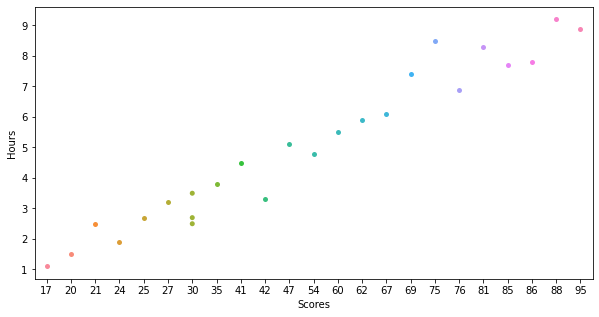

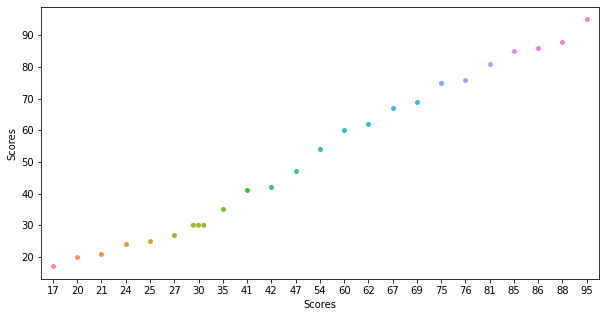

In [14]:
for i in numerical_var:
    plt.figure(figsize=(10,5))
    plt.xlabel('Hours')
    plt.ylabel(i)
    x=data['Scores']
    y=data[i]
    sns.swarmplot(x,y)

- lineplot

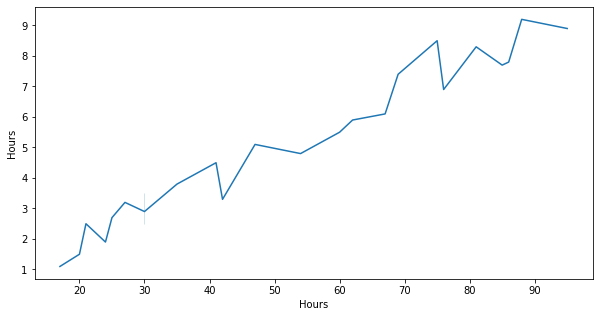

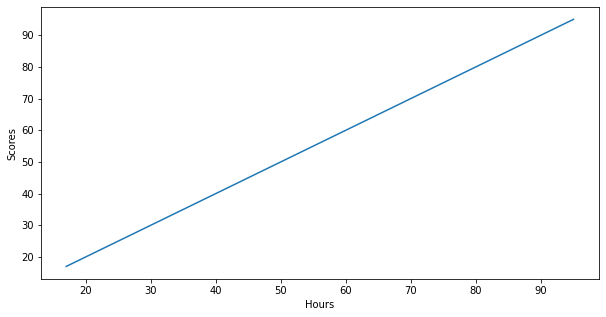

In [15]:
for i in numerical_var:
    plt.figure(figsize=(10,5))
    plt.xlabel('Hours')
    plt.ylabel(i)
    x=data['Scores']
    y=data[i]
    sns.lineplot(x,y)

- scatter plot

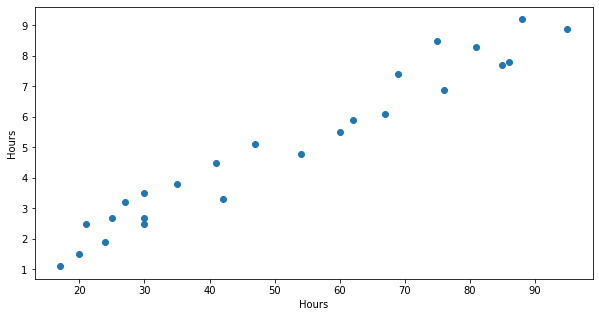

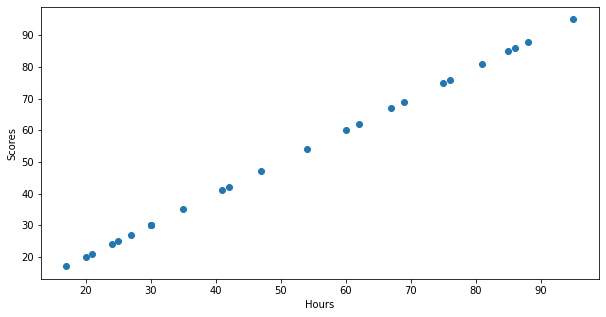

In [16]:
for i in numerical_var:
    plt.figure(figsize=(10,5))
    plt.xlabel('Hours')
    plt.ylabel(i)
    x=data['Scores']
    y=data[i]
    plt.scatter(x,y)

- whitegrid

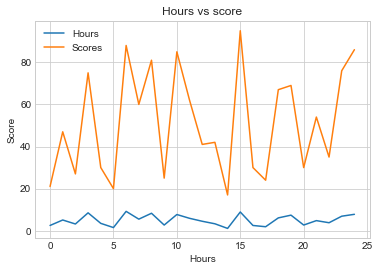

In [17]:
plt.style.use("seaborn-whitegrid")
data.plot(kind="line")
plt.title("Hours vs score")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

- pair plot

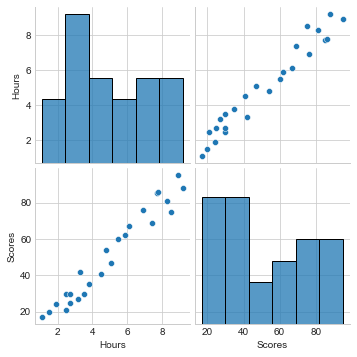

In [18]:
sns.pairplot(data)

In [19]:
X=data.drop(columns=['Scores'])
y=data['Scores']

## Training the Algorithm

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [21]:
LR =LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [22]:
print ('Coeffiecients:', LR.coef_)
print ('Intercept:', LR.intercept_)

Coeffiecients: [9.91065648]
Intercept: 2.0181600414346974


## Plotting the regression line

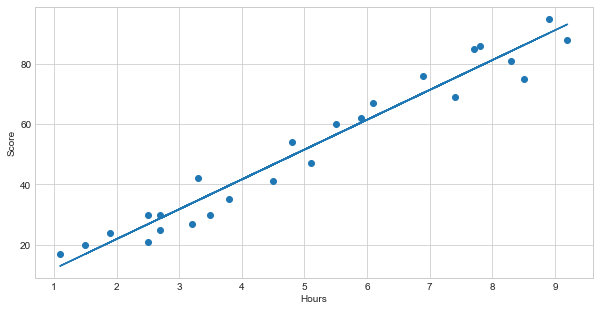

In [23]:
line = LR.coef_*X+LR.intercept_

# Plotting for the test data
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

# Making Predictions

## Predicted Values

In [24]:
print(X_test)
y_pred = LR.predict(X_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


## Actual Values

In [25]:
print(y_test)

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


## Actual vs Predicted values

In [26]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [27]:
LR.score(X_train,y_train)

0.9515510725211552

In [28]:
LR.score(X_test,y_test)

0.9454906892105355

- heat map

<AxesSubplot:>

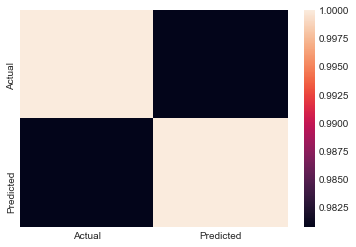

In [29]:
sns.heatmap(data.corr())

## Predicting the score for 9.25 hours study time

In [30]:
predict_score = LR.predict([[9.25]])
print(predict_score)

[93.69173249]


## Evaluation of the model

In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
